<a href="https://colab.research.google.com/github/AinaHerrera/ejerciciosIA/blob/main/Taller_practico_jugadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paso 1: Importando librerias üß∞**
El objetivo de este bloque es cargar todas las librer√≠as de c√≥digo que ser√°n necesarias para el procesamiento de los datos.

Pandas y Numpy: Para leer y manipular los datos del dataset.

Matplotlib y Seaborn: Para crear los gr√°ficos y poder visualizar la informaci√≥n.

Scikit-learn (sklearn): Para obtener las herramientas necesarias para construir y evaluar nuestro modelo de predicci√≥n.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# **Paso 2: Cargando los datos de nuestros jugadores üíæ**

El objetivo de este bloque es leer el archivo CSV que contiene toda la informaci√≥n de los jugadores y cargarlo en nuestro programa.

Aqu√≠, usamos Pandas (pd.read_csv) para abrir el archivo y guardar todos los datos en una tabla que llamamos df (es la abreviatura de DataFrame).

Luego, con df.head(), le pedimos que nos muestre las primeras 5 filas de la tabla. Esto es como asomarnos a la caja para verificar r√°pidamente que los datos se cargaron bien y tienen el aspecto que esperamos. El c√≥digo tambi√©n tiene un peque√±o sistema de seguridad (try/except) por si el archivo no se encuentra, para que nos avise en lugar de fallar.

In [49]:
try:
    df = pd.read_csv('/content/retencion jugadores csv - jugadores.csv')
    print("CSV file loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the path to your CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


jugador_id  horas_juego_dia1  horas_juego_semana  niveles_completados  \
0           1              2.54               29.98                    4   
1           2              0.88                4.86                    2   
2           3              3.31               16.59                    4   
3           4              2.37               20.84                    2   
4           5              3.34               16.03                    5   

   amigos_agregados  compras plataforma  retencion_7dias  
0                12      0.0         pc                1  
1                 0      0.0     mobile                0  
2                15      0.0     mobile                0  
3                11      0.0    console                1  
4                 8      0.0     mobile                1

# **Paso 3: Revisando la "ficha t√©cnica" de los datos üìù**
El objetivo de este bloque es obtener un resumen t√©cnico y r√°pido de nuestro conjunto de datos.

Esto es como mirar la etiqueta de un producto para ver sus especificaciones. El comando (df.info()) nos da una "radiograf√≠a" de la tabla de jugadores, mostr√°ndonos:

Cu√°ntos datos tenemos: Nos confirma que hay 1000 jugadores (entries).

Datos faltantes: La columna Non-Null Count nos dice cu√°ntos registros no est√°n vac√≠os. Si este n√∫mero fuera menor a 1000, sabr√≠amos que nos falta informaci√≥n en esa columna.

Tipos de datos (Dtype): Nos muestra c√≥mo el programa est√° interpretando cada columna. Por ejemplo, float64 son n√∫meros con decimales (como las horas), int64 son n√∫meros enteros (como los niveles) y object suele ser texto (como la plataforma).

En resumen, este paso es una revisi√≥n de calidad fundamental para asegurarnos de que no hay datos faltantes (todav√≠a) y que los tipos de datos son los correctos antes de empezar a analizar.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jugador_id           1000 non-null   int64  
 1   horas_juego_dia1     1000 non-null   float64
 2   horas_juego_semana   1000 non-null   float64
 3   niveles_completados  1000 non-null   int64  
 4   amigos_agregados     1000 non-null   int64  
 5   compras              1000 non-null   float64
 6   plataforma           1000 non-null   object 
 7   retencion_7dias      1000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


# **Paso 4: Un primer vistazo matem√°tico a nuestros jugadores üìä**
El objetivo de este bloque es obtener un resumen estad√≠stico de todas las columnas num√©ricas.

Con el comando df.describe(), le pedimos a Pandas que nos d√© un "reporte r√°pido" de los datos de nuestros jugadores. Nos muestra m√©tricas clave como:

mean (la media): El valor promedio. Por ejemplo, podemos ver las horas promedio que juega un usuario en su primer d√≠a.

min y max: El valor m√≠nimo y el m√°ximo. Esto nos ayuda a entender los rangos de comportamiento, desde el jugador menos activo hasta el m√°s comprometido.

std (desviaci√≥n est√°ndar): Nos dice qu√© tan dispersos est√°n los datos. Un n√∫mero grande significa que hay mucha variedad en el comportamiento de los jugadores.

Este paso es s√∫per √∫til para detectar a simple vista si hay algo raro o inesperado en los datos (por ejemplo, un valor m√°ximo imposible) y para empezar a entender los patrones generales de comportamiento de los jugadores.

In [51]:
display(df.describe())

jugador_id  horas_juego_dia1  horas_juego_semana  niveles_completados  \
count  1000.000000       1000.000000         1000.000000           1000.00000   
mean    500.500000          1.175920            8.984060              1.70900   
std     288.819436          0.486166            3.403622              0.81914   
min       1.000000          0.100000            0.470000              0.00000   
25%     250.750000          1.000000            8.120000              1.00000   
50%     500.500000          1.150000            9.450000              2.00000   
75%     750.250000          1.260000           10.330000              2.00000   
max    1000.000000          5.200000           30.560000              7.00000   

       amigos_agregados     compras  retencion_7dias  
count        1000.00000  1000.00000      1000.000000  
mean            4.07500     0.01808         0.026000  
std             2.01679     0.57174         0.159215  
min             0.00000     0.00000         0.000000  
25%             4.00000     0.00000         0.000000  
50%             4.00000     0.00000         0.000000  
75%             5.00000     0.00000         0.000000  
max            22.00000    18.08000         1.000000

# **Paso 5: Comparando el tiempo de juego con la retenci√≥n üìà**
El objetivo de este bloque es visualizar si existe una relaci√≥n entre las horas que un jugador juega en su primera semana y si decide quedarse en el juego.

Para esto, creamos un gr√°fico de caja (boxplot). Este tipo de gr√°fico es perfecto para comparar dos grupos:

Grupo 1 (izquierda): Jugadores que no fueron retenidos (Not Retained).

Grupo 2 (derecha): Jugadores que s√≠ fueron retenidos (Retained).

Lo que hacemos es comparar la distribuci√≥n de las horas_juego_semana para cada grupo. El gr√°fico nos permite ver de un solo vistazo que la caja de los jugadores "retenidos" est√° mucho m√°s arriba, lo que nos da una pista muy fuerte: los jugadores que juegan m√°s horas durante la primera semana tienen una mayor tendencia a quedarse en el juego.

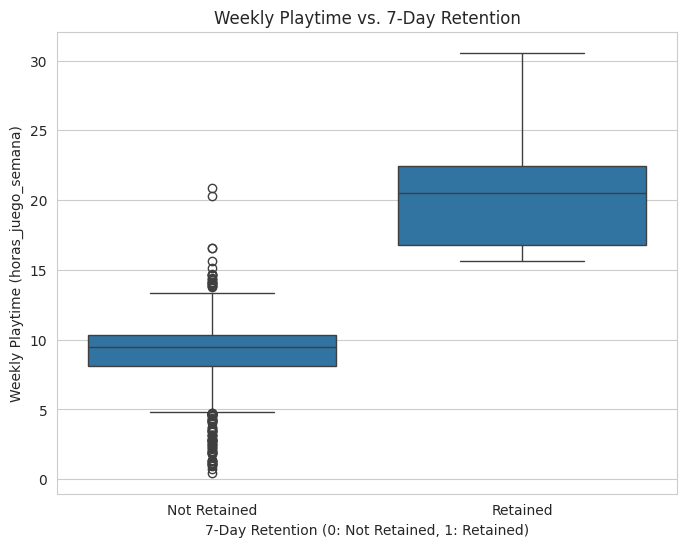

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='horas_juego_semana', data=df)
plt.title('Weekly Playtime vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Weekly Playtime (horas_juego_semana)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 6: Investigando la relaci√≥n entre compras y retenci√≥n üí∞**
El objetivo de este bloque es visualizar si los jugadores que gastan dinero en el juego son m√°s propensos a quedarse.

Al igual que en el paso anterior, usamos un gr√°fico de caja para comparar a los jugadores que se fueron ("Not Retained") con los que se quedaron ("Retained"). Esta vez, miramos la variable compras.

El resultado es muy claro: las cajas para ambos grupos est√°n completamente planas en cero. Esto nos dice que la gran mayor√≠a de los jugadores, sin importar si se quedaron o se fueron, no hicieron ninguna compra en la primera semana. El peque√±o c√≠rculo en el grupo "Retained" es un caso aislado (un "outlier"), un jugador que s√≠ gast√≥ dinero y se qued√≥. Por ahora, esto sugiere que las compras no parecen ser un factor decisivo para la retenci√≥n en general.

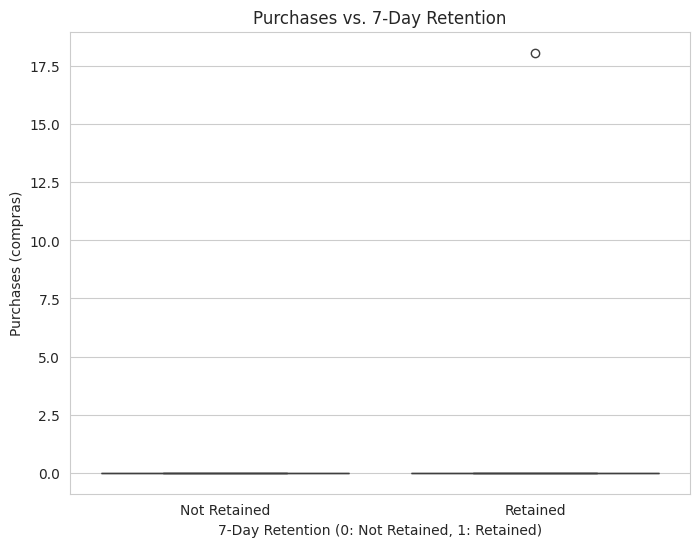

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='compras', data=df)
plt.title('Purchases vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Purchases (compras)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 7: Interpretaci√≥n del Mapa de Calor de la Matriz de Correlaci√≥n** ‚ö°

El mapa de calor de la matriz de correlaci√≥n muestra las relaciones que existen entre nuestras variables num√©ricas. Aqu√≠ explico su relacion con la variable objetivo: retencion_7dias:

horas_juego_dia1 y retencion_7dias: Hay una correlaci√≥n positiva (0.62). Esto sugiere que los jugadores que juegan m√°s durante su primer d√≠a tienen m√°s probabilidades de quedarse.

horas_juego_semana y retencion_7dias: De manera similar, hay una correlaci√≥n positiva moderada (0.58). Esto refuerza la idea de que un mayor compromiso inicial en t√©rminos de tiempo de juego est√° asociado con una mayor retenci√≥n.

niveles_completados y retencion_7dias: Existe una correlaci√≥n positiva (0.53). Parece que completar m√°s niveles al principio est√° relacionado con quedarse en el juego.

amigos_agregados y retencion_7dias: Aqu√≠ tambi√©n vemos una correlaci√≥n positiv (0.62). Los jugadores que se conectan con m√°s amigos son m√°s propensos a ser retenidos, lo que destaca la importancia de las funciones sociales del juego.

compras y retencion_7dias: La correlaci√≥n es relativamente d√©bil (0.19). Esto coincide con el gr√°fico de caja: la mayor√≠a de los jugadores, se queden o no, no hicieron compras en la primera semana. Aunque hay una ligera relaci√≥n positiva, no parece ser un predictor fuerte.

Otras correlaciones importantes
Hay correlaciones positivas muy fuertes entre las diferentes m√©tricas de tiempo de juego (horas_juego_dia1 y horas_juego_semana), y tambi√©n entre el tiempo de juego y los niveles completados o amigos agregados. Suena l√≥gico que los jugadores que pasan m√°s tiempo en el juego completen m√°s niveles y agreguen m√°s amigos.

En resumen, la matriz de correlaci√≥n nos sugiere que el tiempo de juego inicial, los niveles completados y, especialmente, el n√∫mero de amigos agregados est√°n relacionados positivamente con la retenci√≥n de jugadores. Las compras, en cambio, muestran una relaci√≥n mucho m√°s d√©bil.


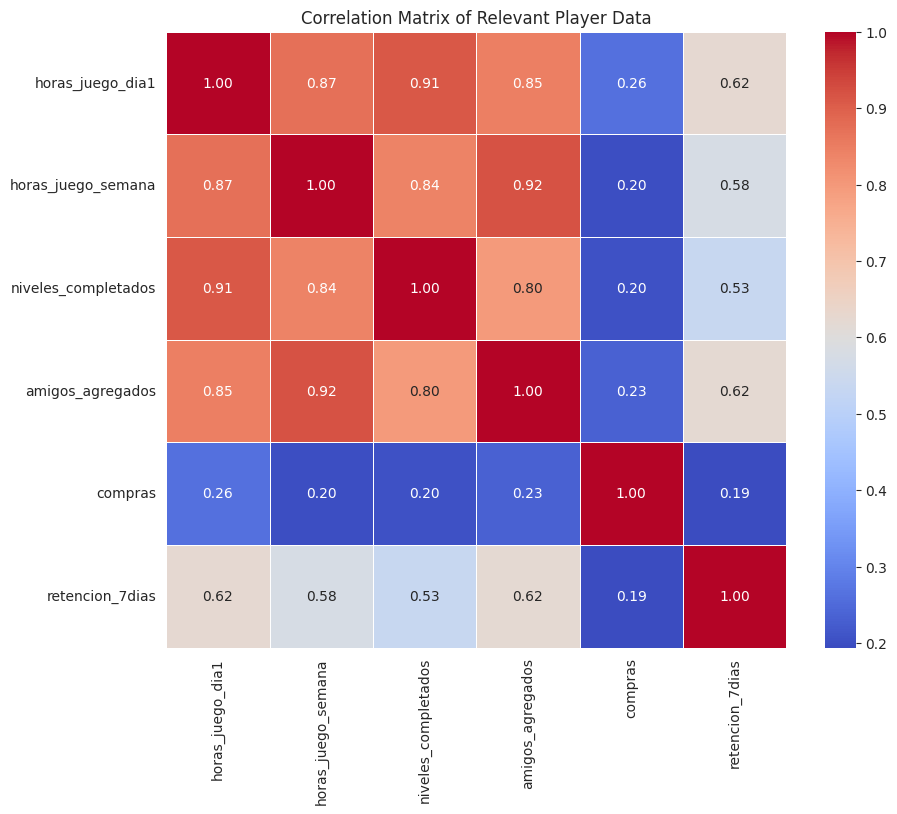

In [54]:
# Select the relevant numerical columns for the correlation matrix
numerical_cols = ['horas_juego_dia1', 'horas_juego_semana', 'niveles_completados', 'amigos_agregados', 'compras', 'retencion_7dias']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Relevant Player Data')
plt.show()

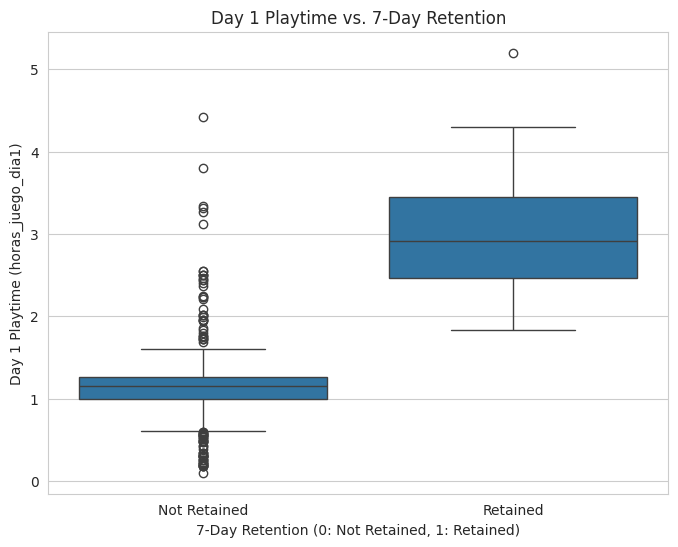

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='horas_juego_dia1', data=df)
plt.title('Day 1 Playtime vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Day 1 Playtime (horas_juego_dia1)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 8: ¬øEs importante el primer d√≠a de juego? ‚è≥**
El objetivo de este bloque es investigar si las horas jugadas espec√≠ficamente en el primer d√≠a son un buen indicador de si el jugador volver√°.

Nuevamente, utilic√© un gr√°fico de caja para comparar a los jugadores que se quedaron (Retained) con los que no (Not Retained). Esta vez, nos enfocamos en la variable horas_juego_dia1.

La conclusi√≥n es muy similar a la que vimos con las horas semanales, pero a√∫n m√°s espec√≠fica. El gr√°fico muestra que los jugadores que dedicaron m√°s tiempo al juego en su primer d√≠a tuvieron una probabilidad mucho mayor de seguir jugando una semana despu√©s. Esto nos dice que la experiencia del primer d√≠a es crucial para enganchar a un nuevo jugador.

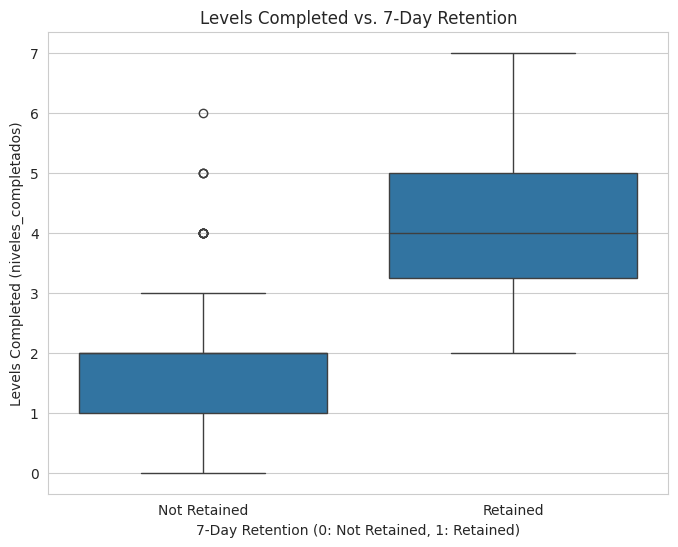

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='niveles_completados', data=df)
plt.title('Levels Completed vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Levels Completed (niveles_completados)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 9: ¬øProgresar en el juego importa para quedarse? üèÜ**
El objetivo de este bloque es descubrir si los jugadores que avanzan m√°s en el juego (completando niveles) son los que tienden a quedarse.

Una vez m√°s, utilicpe un gr√°fico de caja para comparar a nuestros dos grupos de jugadores: los que se fueron (Not Retained) y los que se quedaron (Retained), dando enfasis ahora en la variable niveles_completados.

La conclusi√≥n de este gr√°fico es: los jugadores que fueron retenidos completaron, en promedio, m√°s niveles que los que abandonaron el juego. Esto confirma que el sentimiento de progreso es un factor clave para que un jugador se enganche y decida seguir jugando.

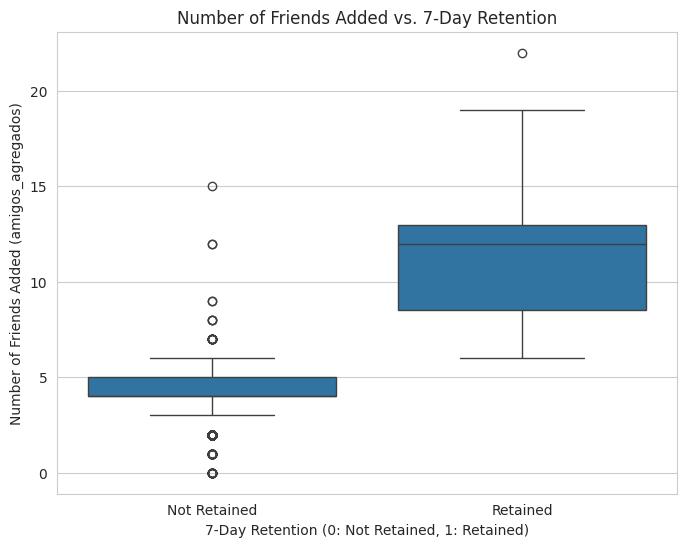

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='amigos_agregados', data=df)
plt.title('Number of Friends Added vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Number of Friends Added (amigos_agregados)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 10: Investigando amigos üßë‚Äçü§ù‚Äçüßë**
El objetivo de este bloque es determinar si tener una actividad social dentro del juego, como agregar amigos, influye en que un jugador decida quedarse.

Para explorarlo, con un gr√°fico de caja que compara la cantidad de amigos_agregados entre los jugadores que se fueron (Not Retained) y los que se quedaron (Retained).

El resultado: La caja del grupo "Retained" est√° notablemente m√°s alta, lo que nos indica que los jugadores que interact√∫an socialmente y agregan m√°s amigos tienen una tendencia mucho mayor a seguir jugando.

Esto sugiere que fomentar las conexiones entre jugadores es una estrategia clave para la retenci√≥n.

*(Siendo muy honesta aqu√≠, no esperaba que esta variable influyera mucho, qued√© impactada).*

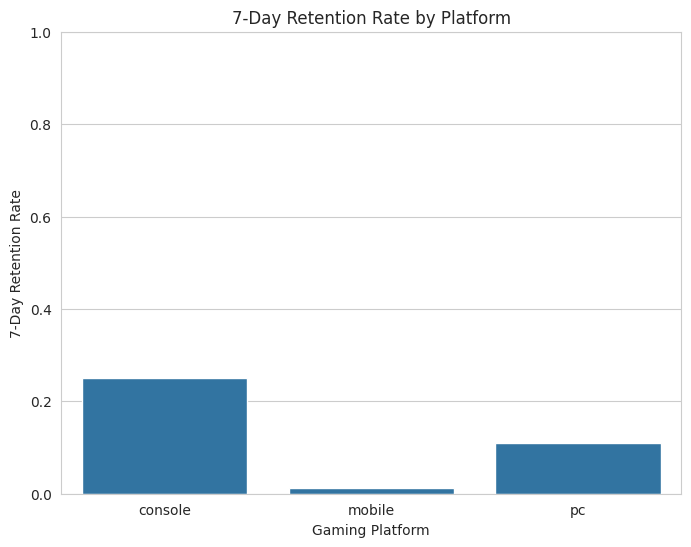

In [58]:
# Calculate the retention rate for each platform
platform_retention = df.groupby('plataforma')['retencion_7dias'].mean().reset_index()

# Plot the retention rate by platform
plt.figure(figsize=(8, 6))
sns.barplot(x='plataforma', y='retencion_7dias', data=platform_retention)
plt.title('7-Day Retention Rate by Platform')
plt.xlabel('Gaming Platform')
plt.ylabel('7-Day Retention Rate')
plt.ylim(0, 1) # Set y-axis limit to represent proportion
plt.show()

# **Paso 11: ¬øLa plataforma de juego importa? üñ•Ô∏èüì±üïπÔ∏è**
El objetivo de este bloque es comparar la tasa de retenci√≥n de jugadores entre las diferentes plataformas (consola, mobile y pc) para ver si alguna es m√°s "pegajosa" que las otras.

El proceso tiene dos partes:

1. **C√°lculo:** Primero, el c√≥digo agrupa a todos los jugadores por su plataforma. Luego, para cada grupo, calcula la tasa de retenci√≥n promedio.

2. **Visualizaci√≥n:** Despu√©s, crea un gr√°fico de barras para poder comparar estos promedios de un solo vistazo. La altura de cada barra nos muestra qu√© porcentaje de jugadores se qued√≥ en cada plataforma.

Conclusi√≥n: el gr√°fico muestra que los jugadores de consola tienen una tasa de retenci√≥n mucho m√°s alta en comparaci√≥n con los de PC y, especialmente, con los de mobile, que tienen la retenci√≥n m√°s baja de todas.

# **Paso 12: ¬øDe d√≥nde vienen nuestros jugadores? üìä**
El objetivo de este bloque es contar cu√°ntos jugadores tenemos en cada una de las plataformas para entender la distribuci√≥n de nuestra base de jugadores.

El gr√°fico nos muestra que la inmensa mayor√≠a de nuestros nuevos jugadores provienen de la plataforma mobile. Este es un dato crucial, porque si lo conectamos con el hallazgo anterior, se puede concluir que la plataforma que atrae a m√°s jugadores (mobile) es tambi√©n la que tiene la tasa de retenci√≥n m√°s baja.

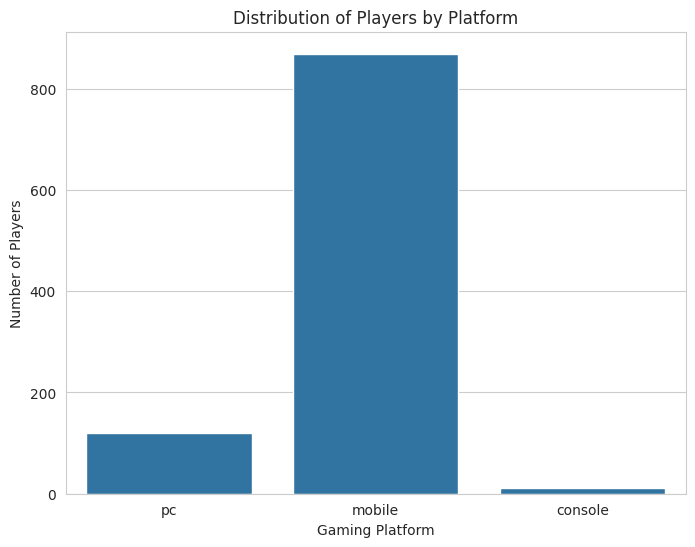

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='plataforma', data=df)
plt.title('Distribution of Players by Platform')
plt.xlabel('Gaming Platform')
plt.ylabel('Number of Players')
plt.show()

# **Paso 13: One-Hot Encoding de variables categoricas de 'plataforma':**

Como el modelo s√≥lo entiende de n√∫meros, pero la columna 'plataforma' tiene texto ('mobile', 'pc', 'console'). Obviamente, no pod√≠a dejarla as√≠.

Para solucionarlo, us√© One-Hot Encoding. Lo que hice fue, b√°sicamente, convertir esa √∫nica columna de texto en nuevas columnas num√©ricas. Simplemente, en una nueva columna llamada plataforma_pc le puse un 1 y en las dem√°s un 0.

Pero aqu√≠ aprend√≠ mucho con este ejercicio. Si creaba una columna para cada plataforma (pc, mobile y console), generaba un problema llamado multicolinealidad (que realmente no conoc√≠a pero aprend√≠ investigando un poco). Esto sucede cuando una variable se puede adivinar perfectamente a partir de las otras. Por ejemplo, si un jugador tiene un 0 en plataforma_pc y un 0 en plataforma_mobile, es 100% seguro que es de 'console'. Esta informaci√≥n es redundante y, al parecer, puede confundir a algunos modelos y afectar sus resultados.

Para evitar este problema, us√© un par√°metro llamado drop_first=True. Lo que hace es eliminar autom√°ticamente una de las nuevas columnas. Por esa raz√≥n, al final me qued√© solo con plataforma_mobile y plataforma_pc. Con estas dos es suficiente, porque si un jugador tiene un 0 en ambas, el modelo ya sabe que pertenece a la categor√≠a que eliminamos ('console').

As√≠ que con este cambio, no solo logr√© que la informaci√≥n estuviera en formato num√©rico, sino que tambi√©n evit√© ese problema de multicolinealidad dejando los datos listos y sin redundancias para el modelo.

In [60]:
df = pd.get_dummies(df, columns=['plataforma'], drop_first=True)
display(df.head())

jugador_id  horas_juego_dia1  horas_juego_semana  niveles_completados  \
0           1              2.54               29.98                    4   
1           2              0.88                4.86                    2   
2           3              3.31               16.59                    4   
3           4              2.37               20.84                    2   
4           5              3.34               16.03                    5   

   amigos_agregados  compras  retencion_7dias  plataforma_mobile  \
0                12      0.0                1              False   
1                 0      0.0                0               True   
2                15      0.0                0               True   
3                11      0.0                1              False   
4                 8      0.0                1               True   

   plataforma_pc  
0           True  
1          False  
2          False  
3          False  
4          False

# **Paso 13: Pasando lista a los datos üìã**
El objetivo de este bloque es revisar nuestro conjunto de datos para ver si falta alguna informaci√≥n por hacer limpieza.

El resultado nos muestra un cero (0) para cada una de las columnas. Esto nos confirma que, por ahora, nuestro dataset est√° completo y no tiene ning√∫n valor faltante.

In [61]:
display(df.isnull().sum())

jugador_id             0
horas_juego_dia1       0
horas_juego_semana     0
niveles_completados    0
amigos_agregados       0
compras                0
retencion_7dias        0
plataforma_mobile      0
plataforma_pc          0
dtype: int64

# **Paso 14: Exportar .csv para el procesamiento en KNIME üíæ**
El objetivo de este bloque es guardar nuestro DataFrame actual en un nuevo archivo CSV.

La instrucci√≥n index=False hace que no guarde los n√∫meros de fila como si fueran una columna de datos, manteniendo el archivo limpio.

En resumen, ya con los datos listos para la siguiente etapa, que es la preparaci√≥n final y la construcci√≥n del modelo predictivo...

In [62]:
# Define the path and filename for the new CSV file
output_csv_path = '/content/modified_jugadores.csv'

# Export the DataFrame to a CSV file (without the index)
df.to_csv(output_csv_path, index=False)

print(f"Modified DataFrame exported successfully to: {output_csv_path}")

Modified DataFrame exported successfully to: /content/modified_jugadores.csv


# **Conclusi√≥n:**

Con este EDA pudimos entender los datos de los jugadores. Despu√©s de revisar toda la informaci√≥n y crear los gr√°ficos, ya se tiene una idea mucho m√°s clara de qu√© es lo que realmente importa para que un jugador decida quedarse en un juego.

Algunos datos interesantes descubiertos fueron:

- Los jugadores que se quedan son los que se enganchan de verdad: juegan m√°s horas (especialmente el primer d√≠a), completan m√°s niveles y se sumergen m√°s en el juego. Pero quiz√°s lo m√°s interesante es el factor social: hacer amigos dentro del juego es un indicador fuerte de que un jugador volver√°.

- Las compras dentro del juego, por ejemplo, no mostraron ser un buen predictor, ya que la mayor√≠a de los jugadores no gastaron dinero.

En resumen, para nuestro modelo de predicci√≥n, ya se tiene una idea m√°s clara de cu√°les son las pistas m√°s importantes a seguir:

1. El compromiso y el progreso del jugador (horas jugadas, niveles completados).

2. La interacci√≥n social (amigos agregados).

3. La plataforma desde la que juegan.

